# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr


# Import the OpenWeatherMap API key
from mykeys import weatherapi_key

# Import citipy to determine the cities based on latitude and longitude
# %pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(1234)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weatherapi_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}{city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

# city_weather = requests.get(city_url).json()
# print(city_weather)

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
           
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Proces

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.70,72,100,4.56,PN,1731451541
1,jinghong,21.9910,100.7341,17.48,98,1,1.02,CN,1731451542
2,taulaga,-11.0553,-171.0883,28.25,73,10,6.55,AS,1731451543
3,bethel,41.3712,-73.4140,7.34,53,1,5.81,US,1731451500
4,gaspe,48.8334,-64.4819,2.12,75,100,6.17,CA,1731451382


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.70,72,100,4.56,PN,1731451541
1,jinghong,21.9910,100.7341,17.48,98,1,1.02,CN,1731451542
2,taulaga,-11.0553,-171.0883,28.25,73,10,6.55,AS,1731451543
3,bethel,41.3712,-73.4140,7.34,53,1,5.81,US,1731451500
4,gaspe,48.8334,-64.4819,2.12,75,100,6.17,CA,1731451382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

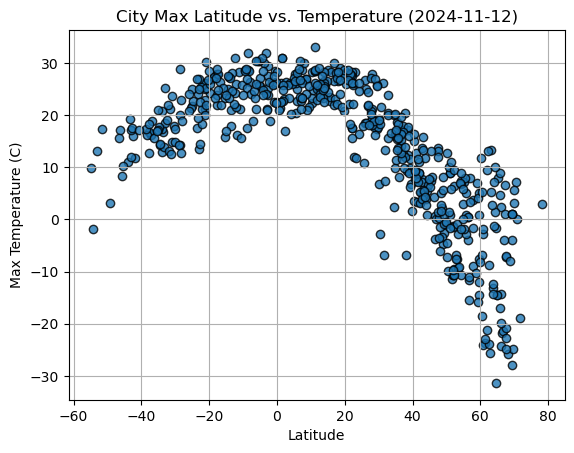

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

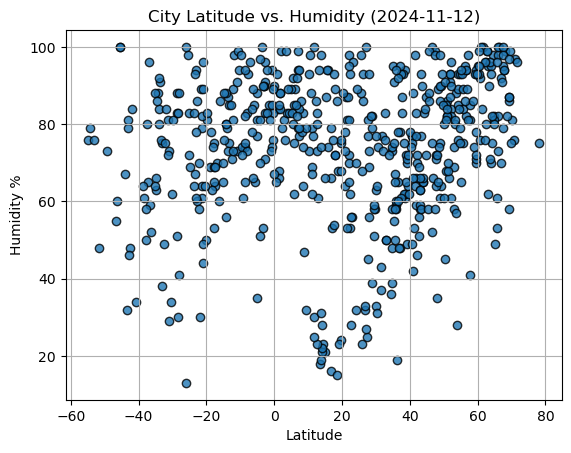

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

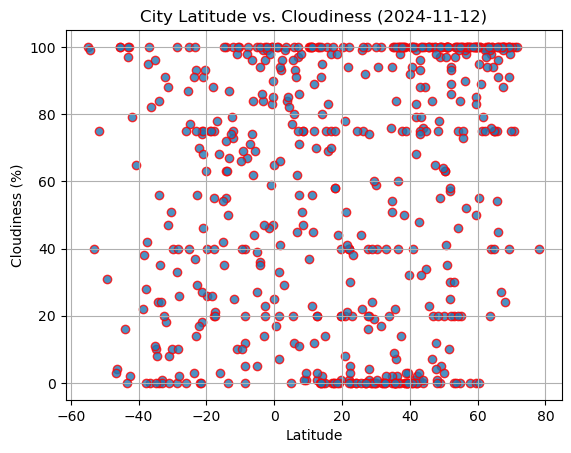

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="red",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

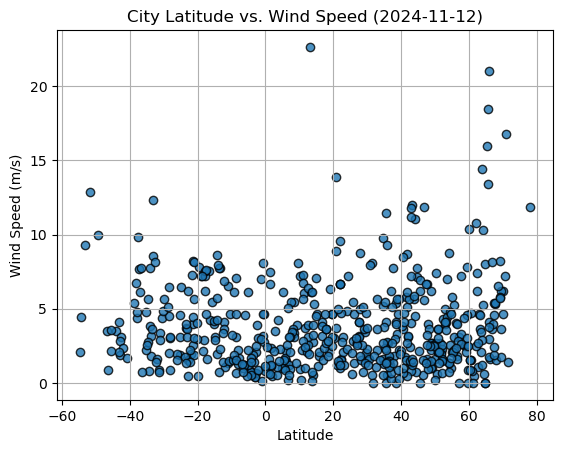

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

      # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values =  slope * x_values + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-",label=f"Regression Line")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Linear Regression: {title} vs Latitude")
    plt.show()

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,17.48,98,1,1.02,CN,1731451542
3,bethel,41.3712,-73.4140,7.34,53,1,5.81,US,1731451500
4,gaspe,48.8334,-64.4819,2.12,75,100,6.17,CA,1731451382
5,constantia,44.1833,28.6500,5.38,83,100,4.49,RO,1731451372
7,berezovyy,51.6667,135.7000,-11.41,66,10,2.70,RU,1731451548


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.70,72,100,4.56,PN,1731451541
2,taulaga,-11.0553,-171.0883,28.25,73,10,6.55,AS,1731451543
6,tsiombe,-25.3000,45.4833,21.35,98,87,1.86,MG,1731451547
9,port mathurin,-19.6833,63.4167,24.23,81,26,7.81,MU,1731451551
10,abepura,-2.6333,140.5833,27.45,83,20,2.06,ID,1731451552


###  Temperature vs. Latitude Linear Regression Plot

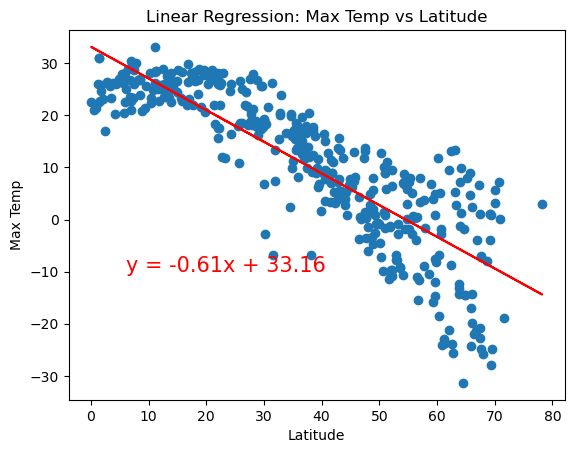

The r-value is: -0.8463376267995876


In [102]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

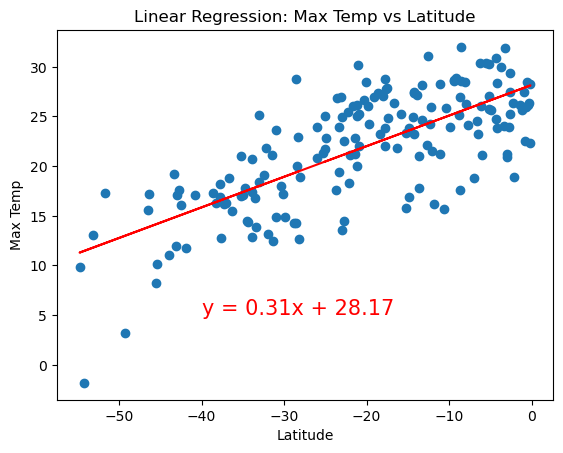

The r-value is: 0.7302787263484282


In [103]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40,5))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:Both Northern and southhemisphere plots show a strong correlation between Latitude and Max temperature. The r value for the Northern hemisphere shows a strong negative correlation; temperature decreases as you move away from the equator, while the r value for the Northern hemisphere shows a strong positive correlation; temperature increases as you move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

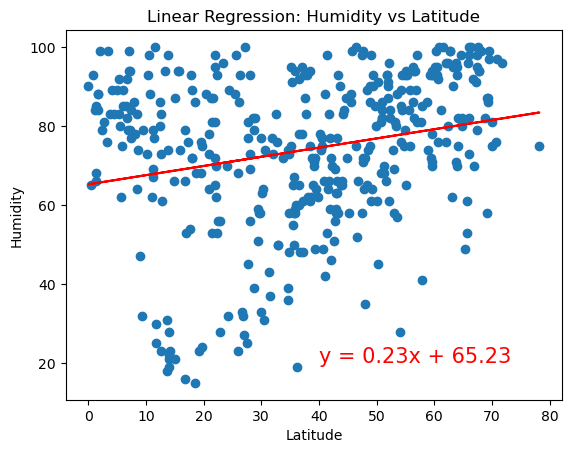

The r-value is: 0.23432494642297402


In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,20))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

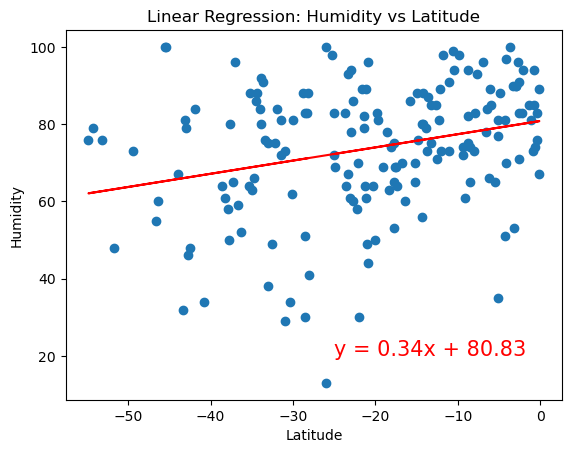

The r-value is: 0.27893051055793716


In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-25, 20))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship: Plots shows weak positive correlation between Latitude and Humidity. In both the southern and northern hemispheres, the correlation is weak indicating that changes in latitude do not significantly affect humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

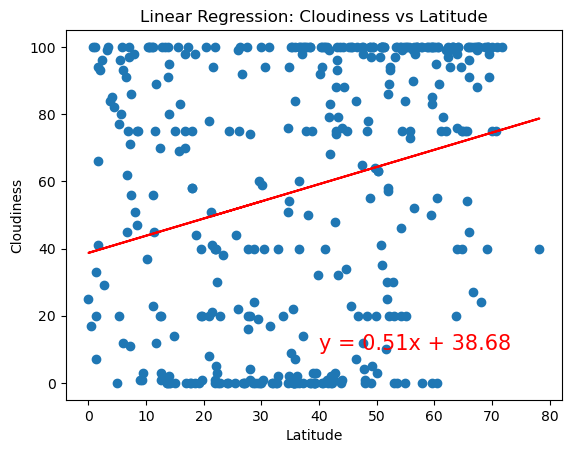

The r-value is: 0.2530095593511333


In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(40,10))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

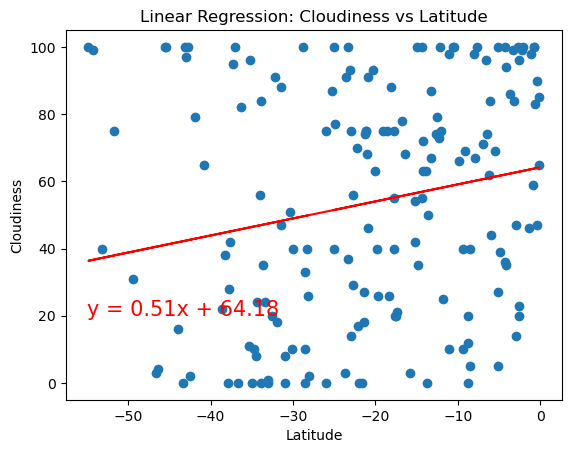

The r-value is: 0.20142258212308814


In [107]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 20))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship: Plots shows weak positive correlation between Latitude and cloudiness in both hemispheres.  Both show slight positive correlation between latitude and cloudiness, the correaltion is not strong enough to reliably predict cloudiness based on latitude alone. 

### Wind Speed vs. Latitude Linear Regression Plot

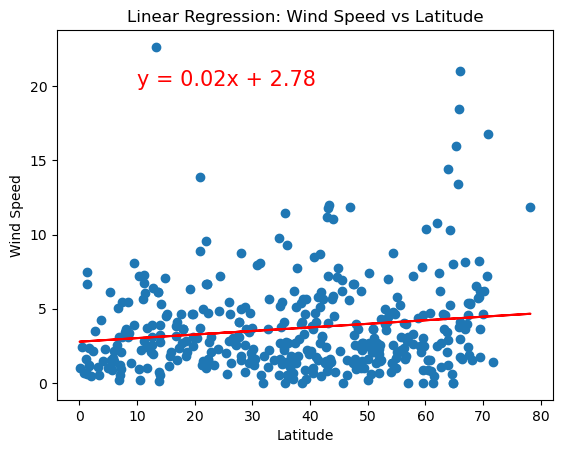

The r-value is: 0.1505853448225013


In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(10,20))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

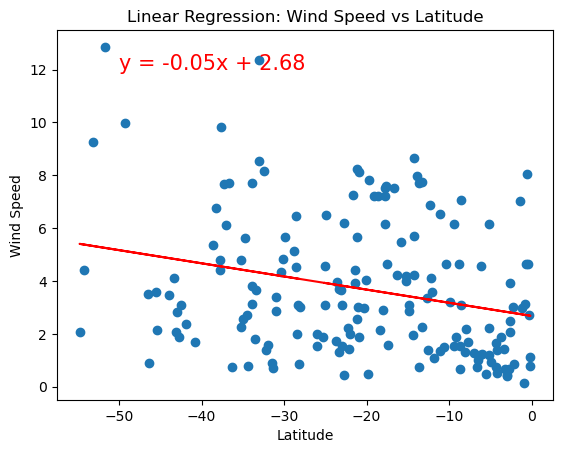

The r-value is: -0.2645020463358507


In [109]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

#Calulate the r value
r_value = pearsonr(x_values, y_values)
r_value = r_value[0]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship: Here, the r-value of 0.1505 in the northern hemisphere plot indicates a weak positive correlation between latitude and wind speed. This suggests that, in the northern hemisphere, wind speed slightly increases as you move toward higher latitudes. However, in the southern hemisphere, there is a weak negative correlation between Latitude and Wind Speed. This suggests that wind speed may decrease as you move from lower to higher latitudes in the southern hemisphere. 